In [2]:
# import library yang diperlukan
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import dataset
hcv = pd.read_csv("D:/Datasets/HCV-Egy-Data/HCV-Egy-Data.csv")
hcv.head(4)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3


In [3]:
# menduplikasi dataset untuk analisis
data = hcv.copy()
data2 = data.drop(columns=['Baselinehistological staging'])
data2.head(4)


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,1,35,2,1,1,1,2,2,2,...,81,5,5,5,655330,634536,288194,5,5,13
1,46,1,29,1,2,2,1,2,2,1,...,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,1,33,2,2,2,2,1,1,1,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,2,33,1,2,1,2,1,2,1,...,88,48,77,33,1041941,449939,585688,744463,582301,10


In [54]:
plt.figure()
plt.scatter(hcv['ALT 36'], hcv['Baselinehistological staging'])
plotPercolumnDistribution(hcv, 10, 5)

NameError: name 'plotPercolumnDistribution' is not defined

In [4]:
# normalisasi data
x_norm = StandardScaler().fit_transform(data2)
# periksa apakah data sudah ternormalisasi
# (rata-rata nol dan simpangan baku 1)
print(x_norm.shape)
print(np.mean(x_norm), np.std(x_norm))

(1385, 28)
3.8110595419830026e-17 1.0


In [6]:
# membuat nama atribut untuk data ternormalisasi
atribut_array = ['fitur'+str(i) for i in range(x_norm.shape[1])]

x_norm_df = pd.DataFrame(x_norm, columns=atribut_array)
x_norm_df.tail(4)

,fitur0,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur18,fitur19,fitur20,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27
1381,0.988897,-0.979276,1.323110,-1.031544,0.994959,1.007974,-1.005067,-0.997836,-1.002168,-1.007974,...,0.927259,0.526054,-0.748807,1.069398,-0.309697,-1.236759,0.366648,-0.809510,-0.205921,0.059234
1382,-0.492022,-0.979276,-0.640203,0.969420,0.994959,-0.992089,-1.005067,-0.997836,0.997836,-1.007974,...,1.232643,0.147116,-1.702479,-1.334782,0.061369,-0.077694,1.813706,0.211971,-0.489235,-0.935186
1383,0.647146,-0.979276,0.096039,0.969420,-1.005067,-0.992089,0.994959,1.002168,0.997836,-1.007974,...,-1.401293,-1.330745,-0.100311,1.352243,-1.274928,-1.448806,0.795717,-1.078409,1.512293,1.302260
1384,0.988897,1.021163,-0.640203,-1.031544,0.994959,1.007974,0.994959,-0.997836,0.997836,-1.007974,...,1.194470,-0.724443,-0.481780,0.079442,1.694779,0.076851,-1.012273,-1.087692,-1.088823,0.805050


In [7]:
X = x_norm_df
#X.head(4)
y = data['Baselinehistological staging']
 

In [11]:
# membuat label
data['y'] = data['Baselinehistological staging']
classes = ['None', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis']

In [13]:
data.y[data.y == 1] = classes[1]
data.y[data.y == 2] = classes[2]
data.y[data.y == 3] = classes[3]
data.y[data.y == 4] = classes[4]

explained variance ratio (first two components): [0.06767312 0.04412207]


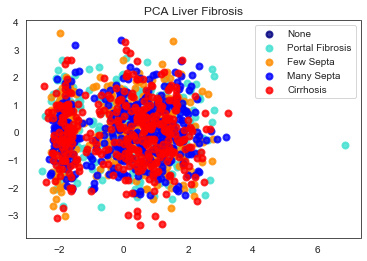

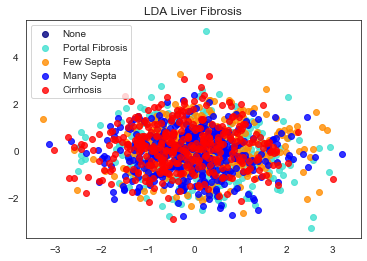

In [48]:
# melatih/fit 
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'blue', 'red']
lw = 2

for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Liver Fibrosis')

plt.figure()
for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA Liver Fibrosis')

plt.show()

In [33]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3, random_state=0)
X_r3 = ica.fit(X).transform(X)
X_r3.shape


(1385, 3)

In [20]:
# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
 #     % str(ica.explained_variance_ratio_))

Text(0.5, 1.0, 'ICA Liver Fibrosis')

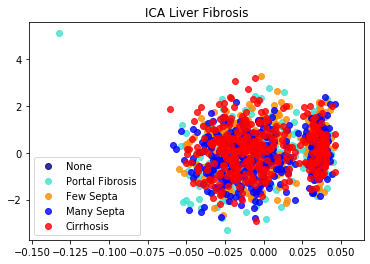

In [34]:
plt.figure()
for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r3[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA Liver Fibrosis')

In [51]:
print(lda.explained_variance_ratio_)
print(pca.explained_variance_ratio_)


[0.5262457  0.27822843]
[0.06767312 0.04412207]


In [50]:
principal_hcv_df = pd.DataFrame(data = X_r, columns=['principal component 1', 'principal component 2'])
principal_hcv_df

,principal component 1,principal component 2
0,-1.755017,-0.063765
1,0.140489,0.120383
2,0.512996,-3.373719
3,2.071384,-0.783128
4,6.856967,-0.486881
...,...,...
1380,-2.055456,-3.131524
1381,-0.752164,-1.331823
1382,1.023171,-1.912980
1383,0.802396,0.941401


In [55]:
ld_hcv_df = pd.DataFrame(data = X_r2, columns=['linear discriminants 1', 'linear discriminants 2'])
ld_hcv_df

,linear discriminants 1,linear discriminants 2
0,2.647112,1.658397
1,-0.300597,3.250756
2,1.807805,-1.461309
3,-0.335746,0.009063
4,0.258847,5.118673
...,...,...
1380,-0.437417,0.274887
1381,-0.138978,0.426782
1382,-0.745324,1.234803
1383,0.329982,0.761056


In [27]:
ica_hcv_df = pd.DataFrame(data = X_r3, columns=['independent component 1', 'independent component 2'])
ica_hcv_df

,independent component 1,independent component 2
0,0.033603,0.003848
1,-0.002370,-0.004367
2,-0.013811,0.083228
3,-0.041062,0.017380
4,-0.133861,0.001845
...,...,...
1380,0.037492,0.071828
1381,0.013688,0.031463
1382,-0.022242,0.049968
1383,-0.014938,-0.020740


In [28]:
classes2 = ['None', 'Portal Fibrosis', 'Few Septa']
colors2 = ['navy', 'turquoise', 'darkorange']

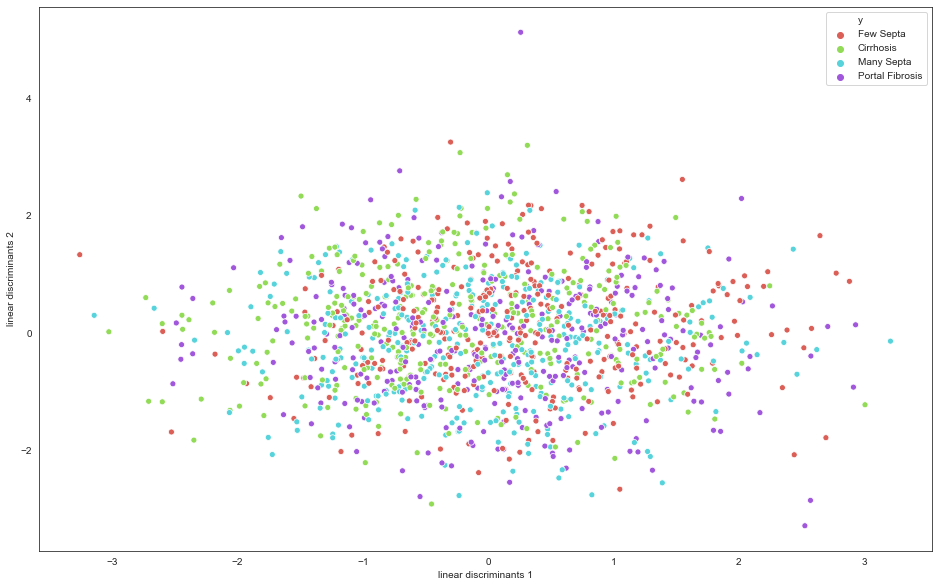

In [66]:
ld_hcv_df['y'] = data['Baselinehistological staging']
ld_hcv_df.y[ld_hcv_df.y == 1] = classes[1]
ld_hcv_df.y[ld_hcv_df.y == 2] = classes[2]
ld_hcv_df.y[ld_hcv_df.y == 3] = classes[3]
ld_hcv_df.y[ld_hcv_df.y == 4] = classes[4]

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="linear discriminants 1", y="linear discriminants 2",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=ld_hcv_df,
    legend="full",
    alpha=1
)

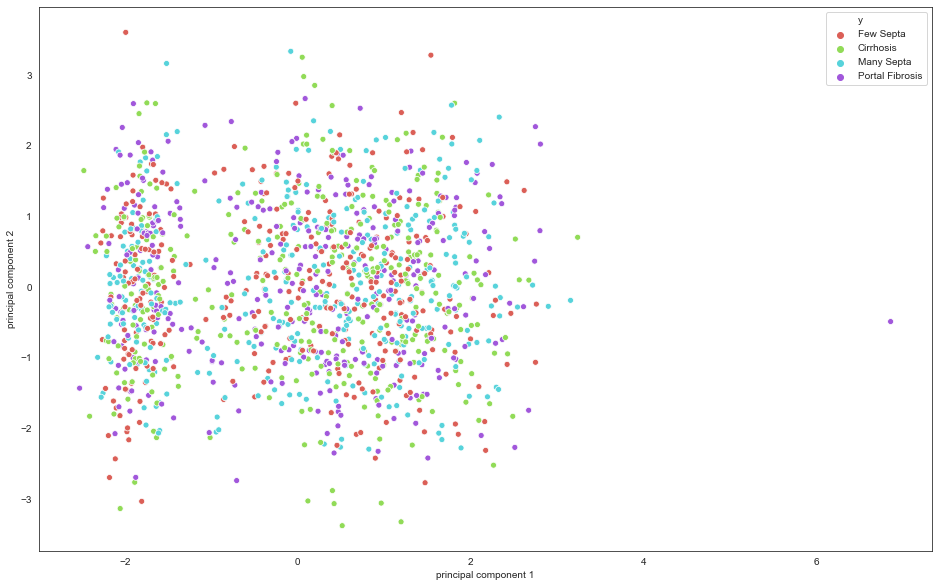

In [65]:
principal_hcv_df['y'] = data['Baselinehistological staging']
principal_hcv_df.y[principal_hcv_df.y == 1] = classes[1]
principal_hcv_df.y[principal_hcv_df.y == 2] = classes[2]
principal_hcv_df.y[principal_hcv_df.y == 3] = classes[3]
principal_hcv_df.y[principal_hcv_df.y == 4] = classes[4]

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=principal_hcv_df,
    legend="full",
    alpha=1
)

In [ ]:
ica_hcv_df['y'] = data['Baselinehistological staging']
ica_hcv_df.y[ica_hcv_df.y == 1] = classes[1]
ica_hcv_df.y[ica_hcv_df.y == 2] = classes[2]
ica_hcv_df.y[ica_hcv_df.y == 3] = classes[3]
ica_hcv_df.y[ica_hcv_df.y == 4] = classes[4]

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="independent component 1", y="independent component 2",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=ica_hcv_df,
    legend="full",
    alpha=1
)